<a href="https://colab.research.google.com/github/Namco0816/Data-exercise/blob/master/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

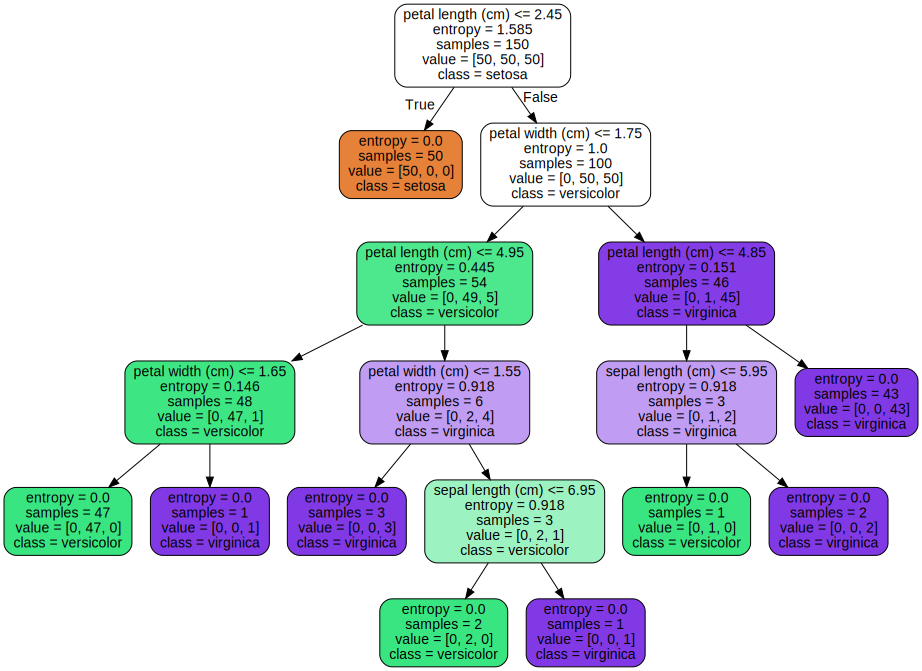

In [48]:
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()
clf = tree.DecisionTreeClassifier(criterion= "entropy",)
clf = clf.fit(iris.data, iris.target)

import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

dot_data = tree.export_graphviz(clf, out_file=None, 
                    feature_names=iris.feature_names,  
                    class_names=iris.target_names,  
                    filled=True, rounded=True,)
graph = graphviz.Source(dot_data)
graph

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [46]:

import os
import pandas as pd

df = pd.read_csv("./bank.csv",delimiter = ";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [0]:
le = preprocessing.LabelEncoder()
for column_name in df.columns:
    if df[column_name].dtype == object:
        df[column_name] = le.fit_transform(df[column_name])
    else:
        pass

In [43]:
from sklearn import tree
from sklearn.model_selection import train_test_split

input_data = df[["age","job","marital","education","default","balance","housing","loan","day","month","duration","campaign","pdays","previous","poutcome"]].values
label = df["y"].values
input_data

array([[ 30,  10,   1, ...,  -1,   0,   3],
       [ 33,   7,   1, ..., 339,   4,   0],
       [ 35,   4,   2, ..., 330,   1,   0],
       ...,
       [ 57,   9,   1, ...,  -1,   0,   3],
       [ 28,   1,   1, ..., 211,   3,   1],
       [ 44,   2,   2, ..., 249,   7,   1]])

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


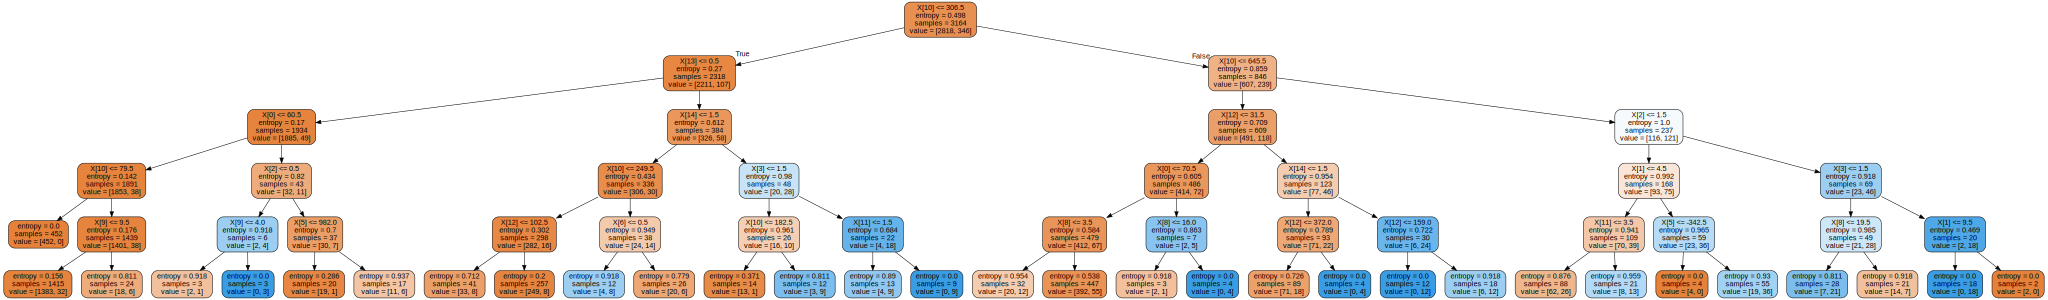

In [49]:
from sklearn import preprocessing

(train_inputs, test_inputs, train_classes, test_classes) = train_test_split(input_data,label, train_size=0.7, random_state=1)
Dtree = tree.DecisionTreeClassifier(criterion= "entropy" , max_depth= 5)
Dtree = Dtree.fit(train_inputs, train_classes)

import graphviz 
bank_dot_data = tree.export_graphviz(Dtree, out_file=None) 
graph_bank = graphviz.Source(bank_dot_data) 
graph_bank.render("y") 

bank_dot_data = tree.export_graphviz(Dtree, out_file=None, 
                    filled=True, rounded=True,)
graph = graphviz.Source(bank_dot_data)
graph